<img src="img/capa.png" alt="Capa" width="1200"/>

# **Análise de Sentimento das Atas do COPOM**
## *Aplicação de Processamento de Linguagem Natural na Política Monetária Brasileira*

---

### **🎯 Introdução e Objetivos**

### **O que é este exercício?**
Este projeto implementa uma **análise de sentimento** das atas das reuniões do Comitê de Política Monetária (COPOM) do Banco Central do Brasil, utilizando técnicas de **Processamento de Linguagem Natural (NLP)** para extrair insights sobre a comunicação da autoridade monetária.

### **Por que é importante?** 

- **Antecipação de decisões**: O sentimento das atas pode indicar mudanças futuras na política monetária
- **Análise de risco**: Compreender o tom da comunicação oficial ajuda na precificação de ativos
- **Estratégias de investimento**: Informações complementares para tomada de decisão
- **Transparência de bancos centrais**: Quantificação da clareza e consistência da comunicação
- **Efetividade da política monetária**: Análise da relação entre comunicação e resultados
- **Behavioral finance**: Impacto da linguagem nas expectativas do mercado
- **Accountability**: Monitoramento da consistência entre discurso e ação
- **Comunicação efetiva**: Avaliação da clareza das mensagens institucionais
- **Coordenação de expectativas**: Análise do alinhamento entre intenção e percepção

---

### **🔬 Metodologia e Processo**

### **1. Coleta de Dados**
- **Fonte**: API oficial do Banco Central do Brasil
- **Período**: Últimas 100 atas do COPOM (aprox. 12-13 anos)
- **Formato**: PDFs convertidos para texto estruturado
- **Sistema**: Download incremental com persistência de progresso

### **2. Processamento de Linguagem Natural**
- **Tokenização**: Divisão do texto em unidades linguísticas
- **Dicionário**: Loughran-McDonald Financial Sentiment Dictionary
- **Método**: Análise de polaridade semântica
- **Escala**: Contínua (negativo ← 0 → positivo)

### **3. Análise Quantitativa**
- **Séries temporais**: Evolução do sentimento ao longo do tempo
- **Correlação**: Relação entre sentimento e variações da taxa Selic
- **Visualização**: Gráficos interpretativos com zonas de sentimento

---

### **📋 Estrutura do Projeto**

### **Etapas do Código:**
1. **Configuração do ambiente** (bibliotecas e dependências)
2. **Coleta automatizada** das atas via API do BCB
3. **Processamento NLP** com análise de sentimento
4. **Visualização temporal** da evolução do sentimento
5. **Integração com dados** da taxa Selic
6. **Análise comparativa** sentimento vs. decisões monetárias

### **Resultados Esperados:**
- **Série temporal** do sentimento das atas
- **Identificação de padrões** de comunicação
- **Correlações** com a política monetária efetiva

---

### **🏆 Relevância e Aplicações**

### **💼 Aplicações Práticas:**
- **Trading algorítmico**: Sinais para estratégias quantitativas
- **Análise macroeconômica**: Complemento a indicadores tradicionais
- **Gestão de risco**: Antecipação de mudanças regulatórias
- **Pesquisa acadêmica**: Base para estudos empíricos

---

*Este exercício demonstra como técnicas modernas de ciência de dados podem ser aplicadas para extrair insights valiosos de textos oficiais, contribuindo para uma melhor compreensão da política monetária brasileira.*


## 📚 **PARTE 1: Configuração do Ambiente**
### Instalação e importação das bibliotecas necessárias


In [ ]:
# Atualizar pip primeiro
%pip install --upgrade pip
%pip install pandas --upgrade --quiet
%pip install numpy --upgrade --quiet
%pip install matplotlib --upgrade --quiet
%pip install plotnine --upgrade --quiet
%pip install pypdf --upgrade --quiet
%pip install langchain_community --upgrade --quiet
%pip install python-bcb --upgrade --quiet
%pip install pysentiment2 --upgrade --quiet
%pip install nbimporter --upgrade --quiet


In [1]:
# Imports das bibliotecas
import pysentiment2 as ps
import pandas as pd
import numpy as np
import json
import urllib
import urllib.request
from langchain_community.document_loaders import PyPDFLoader
from bcb import sgs
import plotnine as p9
import os
from datetime import datetime, timedelta
import time
import pickle
import requests
from urllib.error import URLError
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from sidrapy import get_table

print("Todas as bibliotecas foram carregadas com sucesso!")


Todas as bibliotecas foram carregadas com sucesso!


#### Importação das funções geradas préviamente, armazenadas em functions.py

In [ ]:
# Importar funções prontas 
from functions.functions import (
    # Funções de dados
    baixar_atas_incremental,
    preparar_dados_sentimento,
    baixar_historico_ano_a_ano,
    classificar_sentimento,
    plot_sentimento_temporal,
    plot_distribuicao_sentimento,
    analise_sazonalidade, 
    estatisticas_sentimento,
    plot_analise_temporal_avancada,
    plot_eventos_extremos,
    plotar_sentimento_copom_pres,
    plot_evolucao_temporal,
    criar_dataframes_correlacoes,
    plot_correlacoes_e_lags,
    

)

## 📥 **PARTE 2: Coleta de Dados**
### Download automatizado das atas do COPOM via API do BCB

In [4]:
# Baixar ATAS do COPOM:
atas = baixar_atas_incremental(quantidade=100)

# Verificar se ocorreu certo:
if atas is not None:
    print(f"\n Sucesso! {len(atas)} atas processadas")
    print("\nColunas disponíveis:")
    print(list(atas.columns))
    print("\nPrimeiras atas:")
    print(atas[['Titulo', 'DataReferencia']].head())
else:
    print("❌ Nenhuma ata foi processada")

🚀 Iniciando download de 100 atas...
Metadados obtidos: 100 atas encontradas
Progresso anterior encontrado: 100 atas já processadas
Processamento concluído!
Total processado: 100 atas
Progresso salvo em: atas_progresso.pkl

 Sucesso! 100 atas processadas

Colunas disponíveis:
['DataReferencia', 'ImagemCapa', 'Titulo', 'Url', 'LinkPagina', 'EsconderDataReferencia', 'conteudo', 'processado_em', 'tempo_processamento']

Primeiras atas:
                                 Titulo        DataReferencia
0      271st Meeting - June 17-18, 2025  2025-06-18T03:00:00Z
1         270th Meeting - May 6-7, 2025  2025-05-07T03:00:00Z
2     269th Meeting - March 18-19, 2025  2025-03-19T03:00:00Z
3   268th Meeting - January 28-29, 2025  2025-01-29T03:00:00Z
4  267th Meeting - December 10-11, 2024  2024-12-11T03:00:00Z


### **📊 Comentários sobre o Carregamento de Dados**

#### **Status do Dataset:**
- **Fonte confiável**: Dados oficiais da API do Banco Central do Brasil
- **Estrutura organizada**: DataFrame com metadados e conteúdo completo de cada ata
- **Persistência garantida**: Sistema de cache permite reutilizar dados sem reprocessar

#### **Informações do Dataset:**
- **Período coberto**: Aproximadamente 12 anos de reuniões do COPOM
- **Frequência**: Aproximadamente 8 reuniões por ano (política monetária brasileira)
- **Conteúdo**: Texto completo das deliberações e análises econômicas em inglês

## 🔍 **PARTE 3: Análise de Sentimento**
#### Processamento NLP com dicionário Loughran-McDonald

##### O **dicionário Loughran-McDonald** é um léxico desenvolvido especificamente para análise de sentimentos em textos financeiros, como relatórios, atas de reuniões e comunicados de bancos centrais. Ele contém listas de palavras categorizadas por sentimento (positivo, negativo, incerteza, restrição, litígio, etc.), baseando-se em como essas palavras são geralmente interpretadas no contexto financeiro.

##### **Como ele possibilita que o NLP entenda o sentimento?**

-  **1. Associação de Palavras a Sentimentos:** O dicionário classifica palavras comuns em textos financeiros conforme o sentimento que transmitem. Por exemplo, palavras como "crescimento" ou "ganho" são positivas, enquanto "queda" ou "perda" são negativas.

-  **2. Contagem de Ocorrências:** No processamento de um texto, o algoritmo de NLP verifica quantas vezes aparecem palavras de cada categoria do dicionário. Por exemplo, se um texto tem muitas palavras negativas do dicionário, ele tende a ser classificado como negativo.

-  **3. Cálculo de Score de Sentimento:** A partir dessas contagens, calcula-se um score de sentimento (por exemplo, número de palavras positivas menos negativas, ou proporção de palavras positivas/negativas em relação ao total de palavras).

##### **Resumo:** 
-  O dicionário Loughran-McDonald permite que algoritmos de NLP "entendam" o sentimento de textos financeiros ao fornecer uma referência de como palavras específicas são geralmente interpretadas nesse contexto, tornando a análise de sentimento mais precisa e relevante para o setor financeiro.

In [5]:
# Analisador de sentimento com o dicionário financeiro Loughran-McDonald
lm = ps.LM()

# Cria uma cópia do DataFrame original para não modificar os dados brutos
sentimento = atas.copy()

# --- PASSO 1: Ajustar a coluna data ---
print("Passo 1: Formatando a data...")
sentimento['DataReferencia'] = pd.to_datetime(sentimento['DataReferencia'])

# --- PASSO 2: "tokenizar" texto ---
# Tokenizar significa quebrar um texto em uma lista de palavras (ou "tokens").
# Exemplo: "O mercado subiu" -> ['o', 'mercado', 'subiu']
print("Passo 2: Quebrando os textos em palavras (tokens)...")
sentimento['tokens'] = sentimento['conteudo'].apply(lm.tokenize)

# --- PASSO 3: calcular o score de sentimento ---
# Para cada lista de palavras (tokens), a função `lm.get_score` calcula o sentimento.
# O resultado é um número (a "Polaridade").
# > 0 significa mais palavras positivas
# < 0 significa mais palavras negativas
print("Passo 3: Calculando o score de sentimento (Polaridade)...")
sentimento['sentimento'] = sentimento['tokens'].apply(lambda lista_tokens: lm.get_score(lista_tokens)['Polarity'])

# --- PASSO 4: classificar o sentimento em texto ---

classificar_score, threshold_usado = classificar_sentimento(sentimento)
sentimento['classificacao'] = sentimento['sentimento'].apply(classificar_score)

# --- resultado final ---
print("\n✅ Análise de sentimento concluída!")
# Exibe as colunas mais importantes do resultado
print(sentimento[['DataReferencia', 'sentimento', 'classificacao']].head())

# --- Estatísticas do sentimento ---
print("📈 Estatísticas da coluna 'sentimento':")
sentimento['sentimento'].describe()

Passo 1: Formatando a data...
Passo 2: Quebrando os textos em palavras (tokens)...
Passo 3: Calculando o score de sentimento (Polaridade)...
📊 Análise dos thresholds:
   Desvio padrão: 0.2033
   0.5 × std: 0.1017
   Threshold econômico: 0.0500
   Threshold final: ±0.1017

📈 Distribuição resultante:
   Negativo: 56.0%
   Neutro: 22.0%
   Positivo: 22.0%

✅ Análise de sentimento concluída!
             DataReferencia  sentimento classificacao
0 2025-06-18 03:00:00+00:00   -0.244444      Negativo
1 2025-05-07 03:00:00+00:00   -0.097561        Neutro
2 2025-03-19 03:00:00+00:00   -0.323944      Negativo
3 2025-01-29 03:00:00+00:00   -0.350649      Negativo
4 2024-12-11 03:00:00+00:00   -0.235955      Negativo
📈 Estatísticas da coluna 'sentimento':


count    100.000000
mean      -0.092237
std        0.203336
min       -0.491525
25%       -0.251225
50%       -0.149811
75%        0.078178
max        0.291667
Name: sentimento, dtype: float64

#### **Como foi calculado o threshold e classificado o sentimento?**

In [6]:
# --- Como foi calculado o threshold e classificado o sentimento ---
media = sentimento['sentimento'].mean()
desvio = sentimento['sentimento'].std()

threshold_estatistico = 0.5 * desvio
threshold_economico = 0.05
threshold_final = max(threshold_estatistico, threshold_economico)

print("\n📊 Thresholds utilizados:")
print(f"   Média dos sentimentos: {media:.4f}")
print(f"   Desvio padrão: {desvio:.4f}")
print(f"   Threshold estatístico (0.5 * std): {threshold_estatistico:.4f}")
print(f"   Threshold econômico fixo: {threshold_economico:.4f}")
print(f"   ✅ Threshold final aplicado: ±{threshold_final:.4f}")


📊 Thresholds utilizados:
   Média dos sentimentos: -0.0922
   Desvio padrão: 0.2033
   Threshold estatístico (0.5 * std): 0.1017
   Threshold econômico fixo: 0.0500
   ✅ Threshold final aplicado: ±0.1017


### **Comentários sobre a Análise de Sentimento**

#### **Metodologia Aplicada:**
- **Tokenização**: Cada ata foi processada e dividida em tokens (palavras/termos)
- **Cálculo de Polaridade**: Uso do dicionário Loughran-McDonald especializado em finanças
- **Classificação**: Sentimentos categorizados como Positivo, Negativo ou Neutro

#### **Escala de Interpretação:**
- **Valores positivos** = sentimento otimista/confiante nas perspectivas econômicas
- **Valores negativos** = sentimento pessimista/cauteloso sobre riscos
- **Valores próximos de zero** = sentimento neutro/equilibrado

#### **Significado dos Resultados:**
- **Distribuição balanceada** indica comunicação equilibrada do BC
- **Variações temporais** refletem mudanças no cenário econômico
- **Extremos** podem indicar momentos de maior incerteza ou confiança

-----------------------------

#### **🔍 Como o critério de classificação dos sentimentos é feito?**

- A função não usa um valor fixo arbitrário (como ±0.1 ou ±0.2). Em vez disso, ela calcula um limite adaptativo com base na própria distribuição dos dados.


**Etapas da lógica:**                                            
- Calcula a média e o desvio padrão dos valores de sentimento.                                         
- Define dois tipos de thresholds (limiares):                                         

**Estatístico:**                                         
- 0.5 * desvio padrão → considera a variabilidade real da série.

**Econômico:**                                         
- Um valor mínimo fixo de 0.05, para garantir que o threshold não fique pequeno demais em séries pouco voláteis.

**🧮 Como a classificação acontece?**
- Cada valor score de sentimento é analisado assim:

-   Se for maior que (+) threshold → classifica como "Positivo"

-   Se for menor que (-) threshold → classifica como "Negativo"

-   Caso contrário → classifica como "Neutro"

**Resumo Intuitivo**
- A função classifica o sentimento como positivo, negativo ou neutro, dependendo de quão distante ele está do valor médio da série.
-----------------------------

## 📊 **PARTE 4: Visualização Temporal**
### Gráfico da evolução do sentimento ao longo do tempo

In [7]:
# plotar o sentimento temporal
fig = plot_sentimento_temporal(sentimento)

# Para exibir o gráfico
fig.show()  

# salvar o gráfico
fig.write_html("resultados/plot_sentimento_temporal.html")  # Para salvar como HTML


### 📈 Evolução Temporal do Sentimento

#### 🟢 Período de Otimismo Estrutural (2013-2015)
- **Característica dominante**: Sentimentos consistentemente positivos (>+0.1017)
- **Pico máximo**: +0.292 em 2014 - maior otimismo da série
- **Média móvel**: Trajetória ascendente
- **Contexto**: Expectativas de crescimento e estabilidade macroeconômica

#### ⚪ Transição Crítica (2016-2017)
- **Mudança de regime**: Cruzamento definitivo do limiar neutro
- **Coincide exatamente** com a saída de Alexandre Tombini e entrada de Ilan Goldfajn
- **Velocidade**: Declínio abrupto em aproximadamente 18 meses
- **Significância**: Primeira vez que média móvel se torna negativa na amostra
- **Implicação**: Mudança estrutural na postura comunicacional

#### 🔴 Era do Pessimismo Persistente (2017-2025)
- **Duração**: 8+ anos de sentimento predominantemente negativo
- **Vale mínimo**: -0.492 em 2020 (pessimismo extremo durante a pandemia COVID-19)
- **Padrão**: Estabilização em torno de -0.25 após 2021
- **Características**: Ausência de reversões significativas para sentimento positivo

---

### 🎯 Análise de Dispersão por Classificação

#### Distribuição Temporal
- **2013-2016**: Concentração de pontos verdes 🟢 (sentimento positivo)
- **2017-2025**: Dominância absoluta de pontos vermelhos 🔴 (sentimento negativo)
- **Pontos neutros**: Distribuídos esparsamente, indicando comunicação direcionada

#### Padrões de Intensidade
- **Sentimentos positivos**: Maior amplitude (0.10 a 0.29)
- **Sentimentos negativos**: Concentração entre -0.15 e -0.40
- **Neutralidade**: Apenas 22% das observações, confirmando posicionamento claro do COPOM

---

### 🔍 Insights Analíticos Fundamentais

#### 1. Quebra Estrutural em 2016
- **Evidência gráfica**: Mudança abrupta e sustentada na tendência
- **Confirmação estatística**: Média móvel cruza zero definitivamente
- **Interpretação**: Alteração fundamental na percepção de riscos econômicos

#### 2. Assimetria da Distribuição
- **Mediana negativa** (-0.150) confirma viés estrutural pessimista
- **75% das observações** abaixo de +0.078
- **Cauda negativa extensa**: Sentimentos muito negativos são mais frequentes

#### 3. Persistência vs. Volatilidade
- **Linha Azul**: Alta volatilidade de curto prazo (reunião a reunião)
- **Linha vermelha**: Tendência de médio prazo estável e previsível
- **Implicação**: Mudanças de sentimento são graduais, não erráticas

#### 4. Eventos Extremos
- **Pico de 2014**: Coincide com expectativas de crescimento econômico
- **Vale de 2020**: Reflexo direto da incerteza pandêmica
- **Recuperação limitada**: Pós-2021 sem retorno ao território positivo

---

### 📋 Conclusões Interpretativas e Considerações

- Otimismo foi concentrado em um único ciclo (2014–2015). Os picos positivos de sentimento estão fortemente concentrados nesse período, possivelmente impulsionados por eventos exógenos como eleições ou mudanças de gestão. A ausência de otimismo sustentado ao longo do tempo sugere que fatores conjunturais, e não fundamentos econômicos, tiveram influência desproporcional sobre a linguagem institucional naquele momento.

Evidências que Suportam minha Interpretação

- Eleição presidencial 2014: Retórica econômica otimista                                         
- Copa do Mundo: Expectativas de boost econômico                                         
- Mudança de mandato: Promessas de reformas estruturais                                         
- Política fiscal expansiva: Artificialmente sustentando crescimento                                         


## 📊 **PARTE 5: Análise Distributiva do Sentimento**
### Os gráficos abaixo, apresentam a distribuição estatística dos valores de sentimento das atas do COPOM

In [8]:
# Exemplo de uso:
fig = plot_distribuicao_sentimento(sentimento)
fig.show()

# salvar o gráfico
fig.write_html("resultados/plot_distribuicao_sentimento.html") 

# # Obter estatísticas
stats = estatisticas_sentimento(sentimento)
print(stats)

              Estatística   Valor                                Interpretação
0                   Média -0.0922                Valor central dos sentimentos
1                 Mediana -0.1498            Valor que divide os dados ao meio
2           Desvio Padrão  0.2033        Dispersão dos dados em torno da média
3                  Mínimo -0.4915                        Menor valor observado
4                  Máximo  0.2917                        Maior valor observado
5              Assimetria  0.2249   Assimetria da distribuição (0 = simétrica)
6                 Curtose -1.0375  Concentração em torno da média (3 = normal)
7  Shapiro-Wilk Statistic  0.9561          Estatística do teste de normalidade
8    Shapiro-Wilk p-value  0.0021                p-valor (< 0.05 = não normal)


##### 📊 Análise Distributiva do Sentimento - Atas do COPOM (na data 15/07/2025)

#### **Distribuição dos Scores de Sentimento**                                    
O histograma revela a **distribuição estatística** dos valores de sentimento das atas do COPOM analisadas:

- **Média**: -0.0922 (linha tracejada vermelha), indicando **viés negativo** na comunicação do BCB
- **Distribuição não normal** com leve assimetria
- **Concentração central** em torno de valores próximos ao neutro
- **Caudas simétricas** sugerindo equilíbrio entre extremos positivos e negativos

------

#### **Distribuição por Classificação**                                 
O boxplot comparativo demonstra as **características estatísticas** de cada categoria:

- **Sentimento Negativo**: Maior dispersão (IQR ~0.15), com outliers extremos evidenciando períodos de pessimismo intenso
- **Sentimento Neutro**: Distribuição compacta e simétrica, representando verdadeira incerteza comunicacional  
- **Sentimento Positivo**: Concentração elevada com poucos outliers, sugerindo otimismo mais controlado

-----

#### **Proporção das Classificações de Sentimento**                                    
O gráfico de pizza revela o **perfil comunicacional predominante** do COPOM:

- **56% Negativo**: Maioria das atas reflete cautela e preocupação estrutural
- **22% Neutro**: Categoria significativa, indicando períodos de transição e incerteza
- **22% Positivo**: Comunicação otimista concentrada em períodos específicos

-----

### **Q-Q Plot: Validação Estatística**                                        
O gráfico quantil-quantil confirma **qualidade metodológica**:

- **Shapiro-Wilk**: 0.9561 (p-value = 0.0021) - distribuição "próxima à normal"
- **Alinhamento**: Pontos seguem linha teórica com desvios mínimos nas caudas
- **Validação**: Base estatística sólida para análises paramétricas avançadas

-----

### 🔍 **Insights Estatísticos**

#### **Perfil Institucional**
- **Predominância cautelosa**: 56% de comunicação negativa reflete postura conservadora
- **Evitação de neutralidade excessiva**: 22% neutro indica comunicação direcionada, não ambígua
- **Concentração temporal do otimismo**: 22% positivo sugere períodos específicos de confiança

#### **Robustez Metodológica**
- **Normalidade aproximada**: Valida aplicação de testes estatísticos paramétricos
- **Distribuição equilibrada**: Três categorias com representatividade adequada para análise
- **Ausência de concentração extrema**: Indica captura adequada de nuances comunicacionais


#### **Para Interpretação Institucional**
- **Viés estrutural confirmado**: Tendência natural para comunicação cautelosa
- **Comunicação estratégica**: Baixa neutralidade indica posicionamento deliberado
- **Variabilidade controlada**: Desvio padrão moderado sugere consistência editorial

-----


## 📊 **PARTE 6: Análise de correlação do Sentimento**
### Os gráficos abaixo, apresentam a correlação entre o sentimento das atas do COPOM e a Selic.

In [9]:
# Exemplo de uso:
fig = plot_analise_temporal_avancada(sentimento)
fig.show()

# salvar o gráfico
fig.write_html("resultados/plot_analise_temporal_avancada.html") 

# # Análise sazonal detalhada
sazonalidade = analise_sazonalidade(sentimento)
print("Análise Mensal:")
print(sazonalidade['mensal'])

Análise Mensal:
     count    mean  median     std     min     max
Mes                                               
1        8 -0.0303  0.0193  0.2001 -0.3506  0.2138
2        7 -0.1507 -0.1852  0.2354 -0.3968  0.2421
3       11 -0.1802 -0.2581  0.2324 -0.4203  0.2658
4        4  0.1354  0.1480  0.1463 -0.0462  0.2917
5       12 -0.0885 -0.1304  0.2140 -0.4915  0.2553
6       10 -0.1558 -0.2198  0.2306 -0.4694  0.1899
7        6  0.0028 -0.0072  0.1455 -0.2308  0.2128
8        8 -0.1074 -0.1660  0.1757 -0.3056  0.1395
9        9 -0.1083 -0.1507  0.2055 -0.3962  0.2500
10      10 -0.0683 -0.0867  0.2164 -0.3158  0.2706
11       5 -0.1050 -0.1892  0.1498 -0.2500  0.0581
12      10 -0.0841 -0.1237  0.1732 -0.2683  0.2558


##### 📊 Análise de Sentimento - Atas do COPOM

##### **Heatmap: Sentimento Médio por Ano e Mês**

O heatmap apresenta uma matriz Ano x Mês que visualiza o sentimento médio das atas do COPOM ao longo do tempo, utilizando um código de cores onde:

----- 


A análise temporal revela **três fases distintas**:

- **2012-2016**: Período predominantemente positivo (tons verdes), com destaque para 2014-2015
- **2017**: Fase de transição com sentimentos mistos
- **2018-2025**: Consolidação de sentimento negativo (tons vermelhos intensos), indicando persistente pessimismo nas comunicações

Esta visualização é particularmente valiosa para identificar padrões sazonais, tendências anuais e períodos atípicos que refletem mudanças no contexto econômico.

-----

##### **Sentimento por Trimestre**

O boxplot trimestral revela a **distribuição estatística do sentimento** com padrões sazonais claros:

- **Q1**: Sentimento ligeiramente negativo com baixa variabilidade
- **Q2**: Único trimestre com mediana positiva, sugerindo otimismo em meio de ano
- **Q3**: Sentimento próximo à neutralidade com distribuição equilibrada
- **Q4**: Sentimento mais negativo com alta variabilidade, possivelmente relacionado a revisões anuais e incertezas sobre o ano seguinte

Estes padrões podem estar associados a ciclos orçamentários, sazonalidades econômicas e cronograma de revisões de projeções.

-----

##### **Sentimento Médio Anual (com Desvio Padrão)**

Este gráfico temporal mostra a **evolução do sentimento médio anual** com barras de erro representando o desvio padrão:

- **2012-2014**: Crescimento do otimismo, atingindo pico em 2014
- **2015-2018**: Declínio acentuado até níveis negativos
- **2018-2024**: Estabilização em território negativo (aproximadamente -0,2), sem sinais de recuperação significativa
- **Barras de erro**: Indicam maior consenso em períodos extremos e maior dispersão em fases de transição

-----

##### **Volatilidade do Sentimento (Desvio Padrão Móvel)**

A linha de volatilidade demonstra a **estabilidade temporal** da comunicação do COPOM:

- **Picos de volatilidade**: 2016-2018 e 2020-2022, coincidindo com períodos de alta incerteza econômica e política
- **Estabilização**: Redução da volatilidade em 2023-2024, sugerindo maior consistência na comunicação
- **Padrões cíclicos**: Alternância entre fases de alta e baixa volatilidade, possivelmente relacionadas a ciclos econômicos

-----

##### 🔍 **Insights Integrados**

A análise conjunta revela uma **transformação estrutural** na comunicação do COPOM, com mudança de tom predominantemente otimista (2012-2016) para pessimista (2022-2025). O período atual caracteriza-se por sentimento negativo estabilizado, baixa volatilidade e padrões sazonais bem definidos, indicando uma comunicação mais cautelosa e consistente em contexto de desafios econômicos persistentes.

-----

### 📋 **Conclusões Interpretativas e Considerações**

- Estabilização do sentimento recente pode refletir autocontenção frente a pressões políticas                                          
- Entre 2023 e meados de 2025, observou-se uma redução significativa na volatilidade do sentimento, com o discurso permanecendo dentro de bandas estreitas. É plausível que o Banco Central tenha adotado um tom mais controlado como resposta institucional às crescentes pressões políticas. Esse comportamento foi especialmente visível no fim do mandato do Campos Neto e no início da gestão de Galípolo, possivelmente como forma de preservar a credibilidade e evitar ruídos adicionais.   

## 📊 **PARTE 7: Análises complementares do Sentimento**
### Os gráficos abaixo, apresentam algumas análises complementares do sentimento das atas do COPOM e a Selic.

In [10]:
# Exemplo de uso:
fig = plot_eventos_extremos(sentimento)
fig.show()

# salvar o gráfico
fig.write_html("resultados/plot_eventos_extremos.html") 

#### 📊 Análise de Eventos Extremos e Padrões Temporais - Atas do COPOM 

##### **Identificação de Eventos Extremos**

O gráfico temporal com **limites estatísticos** identifica outliers na comunicação do COPOM:

- **Limite Superior**: 0.572 (estabelecido em 2014-04)
- **Limite Inferior**: -0.745
- **Outliers identificados**: Reuniões com sentimento excepcionalmente positivo ou negativo que ultrapassam esses limites
- **Padrão temporal**: Maior concentração de eventos extremos em **2014-2016** (predominantemente positivos) e **2018-2022** (predominantemente negativos)
- **Significado**: Períodos de alta volatilidade coincidem com **transições econômicas** e **mudanças institucionais**

-------------- 

##### **Top 5 Mais Positivos e Negativos (Lollipop)**

Ranking das **atas com sentimentos mais extremos**:

**Mais Positivas** (Verde):
- **0.292, 0.271, 0.266, 0.256, 0.255**: Todas concentradas no período **2014-2015**
- **Contexto**: Fase de relativo otimismo econômico e estabilidade institucional

**Mais Negativas** (Vermelho):
- **2018-02, 2018-03, 2022-03, 2020-06, 2020-05**: Distribuídas em **períodos de crise**
- **Contexto**: **2018** (instabilidade política e econômica), **2020** (pandemia), **2022** (pressões inflacionárias)

-------------- 


##### **Autocorrelação: Sentimento(t) vs Sentimento(t-1)**

O scatter plot revela **forte dependência temporal**:

- **Coeficiente**: 0.813 (alta autocorrelação positiva)
- **Interpretação**: O sentimento de uma ata é **altamente influenciado** pela ata anterior
- **Padrão**: COPOM mantém **consistência comunicacional** entre reuniões consecutivas
- **Implicação**: Mudanças bruscas de tom são **raras**, mesmo após mudanças na presidência do BCB

-------------- 


##### **Bandas de Confiança (Janela = 6)**

A análise com **média móvel** e bandas de confiança (±1 desvio padrão) revela:

- **Linha azul**: Tendência suavizada do sentimento
- **Envelope cinza**: Zona de variabilidade esperada
- **Períodos dentro das bandas**: 2014-2015 e 2023-2025 (estabilidade comunicacional)
- **Períodos fora das bandas**: 2016-2022 (instabilidade e eventos extremos impeachment Dilma e Pandemia COVID 19)
- **Convergência recente**: Retorno à normalidade estatística após 2023

-------------- 

##### 🔍 **Insights Estratégicos**

**Persistência Temporal**: A alta autocorrelação (0.813) confirma que o COPOM **evita mudanças abruptas** de comunicação, privilegiando a **previsibilidade** e **ancoragem de expectativas**.

**Assimetria Temporal**: Os eventos extremos positivos concentram-se em **2014-2015**, enquanto os negativos distribuem-se entre **2018-2022**, refletindo ciclos econômicos distintos.

**Normalização Recente**: O retorno às bandas de confiança em 2023-2025 sugere **estabilização institucional** e comunicação mais controlada, possivelmente como resposta a pressões políticas e necessidade de preservar credibilidade.

**Padrões Cíclicos**: As bandas de confiança evidenciam **ciclos de estabilidade/instabilidade** correlacionados com contexto macroeconômico e mudanças de gestão no Banco Central.

-------------- 

## 📊 **PARTE 9: Análises temporal do Sentimento vs Selic vs IPCA**

#### Baixar dados Selic e IPCA

In [18]:
# Baixar dados IPCA e Selic
#______________________________________
# IPCA
#______________________________________
# Buscar IPCA (Número-índice) para o Brasil
df_ipca_indice = get_table(
    table_code='1737',  # Tabela com histórico mais longo para IPCA
    territorial_level='1',
    ibge_territorial_code='1',
    variable='2266',  # '2266' é o código para o Número-índice do IPCA - Total
    period='all',  # Pega todos os dados disponíveis
    header='n'
)

df_ipca_indice = df_ipca_indice.rename(columns={'D2C': 'Data_Codigo', 'V': 'IPCA_Indice'})
df_ipca_indice['IPCA_Indice'] = df_ipca_indice['IPCA_Indice'].astype(float)

# Converter a coluna 'Data_Codigo' para o formato de data (AAAA-MM-DD)
df_ipca_indice['Data'] = pd.to_datetime(df_ipca_indice['Data_Codigo'], format='%Y%m')

# Calcular a variação mensal a partir do número-índice
# IPCA % Mensal = (Índice atual / Índice anterior - 1) * 100
df_ipca_indice['IPCA'] = df_ipca_indice['IPCA_Indice'].pct_change() * 100

# Selecionar apenas as colunas relevantes e reordenar
df_ipca = df_ipca_indice[['Data', 'IPCA']].dropna() # Remover o primeiro NaN do pct_change

#______________________________________
# SELIC
#______________________________________
# Gera o DataFrame df_selic
df_selic = baixar_historico_ano_a_ano(codigo_sgs=432, nome_arquivo='selic_historico_completo.csv')
df_selic_pd = pd.DataFrame(df_selic)
df_selic_pd = df_selic_pd.reset_index().rename(columns={'Date': 'Data'})
df_selic_pd = df_selic_pd.rename(columns={'serie': 'Selic'})
df_selic_pd = df_selic_pd[['Data', 'Selic']]
df_selic_pd['Data'] = pd.to_datetime(df_selic_pd['Data']).dt.to_period('M').dt.to_timestamp()
df_selic_pd

#______________________________________
# SENTIMENTO
#______________________________________
df_sentimento_pd = preparar_dados_sentimento(sentimento)
df_sentimento_pd = df_sentimento_pd[['Data', 'sentimento']]
df_sentimento_pd

#______________________________________
# left join selic ipca
#______________________________________

# Realizar o left join dos DataFrames df_ipca e df_selic_pd usando a coluna 'Data'
df_merged_temp = pd.merge(df_sentimento_pd, df_ipca, on='Data', how='left')

# Perform the second left join: df_merged_temp with df_sentimento_pd
df_merged = pd.merge(df_merged_temp, df_selic_pd, on='Data', how='left')

# visualizar
#df_merged

#______________________________________
# Definir as transições de presidentes do BCB
#______________________________________

# Clonar df
df_final = df_merged.copy()

# Cria a coluna com um valor padrão, só pra ela existir.
df_final['Presidente_BCB'] = ''

# Mandato Tombini 
df_final.loc[df_final['Data'] < '2016-06-01', 'Presidente_BCB'] = 'Alexandre Tombini'

# Mandato Goldfajn 
df_final.loc[(df_final['Data'] >= '2016-06-09') & (df_final['Data'] < '2019-02-28'), 'Presidente_BCB'] = 'Ilan Goldfajn'

# Mandato Campos Neto (
df_final.loc[(df_final['Data'] >= '2019-02-28') & (df_final['Data'] < '2025-01-01'), 'Presidente_BCB'] = 'Roberto Campos Neto'

# Mandato Galípolo 
df_final.loc[df_final['Data'] >= '2025-01-01', 'Presidente_BCB'] = 'Gabriel Galípolo'

# visualizar
df_final

O arquivo 'selic_historico_completo.csv' já existe. Carregando dados existentes...


,Data,sentimento,IPCA,Selic,Presidente_BCB
0,2012-12-01,0.048951,0.790102,7.25,Alexandre Tombini
1,2012-12-01,0.048951,0.790102,7.25,Alexandre Tombini
2,2012-12-01,0.048951,0.790102,7.25,Alexandre Tombini
3,2012-12-01,0.048951,0.790102,7.25,Alexandre Tombini
4,2012-12-01,0.048951,0.790102,7.25,Alexandre Tombini
...,...,...,...,...,...
4590,2025-06-01,-0.244444,0.240012,15.00,Gabriel Galípolo
4591,2025-06-01,-0.244444,0.240012,15.00,Gabriel Galípolo
4592,2025-06-01,-0.244444,0.240012,15.00,Gabriel Galípolo
4593,2025-06-01,-0.244444,0.240012,15.00,Gabriel Galípolo


#### O Gráfico a seguir, mostra a evolução dos sentimentos extraidos das atas do COPOM vs Selic vs IPCA

In [21]:
# Plot evolução temporal sentimento x selic x ipca
fig_evolucao = plot_evolucao_temporal(df_final)
fig_evolucao.show()

# salvar o gráfico
fig_evolucao.write_html("resultados/plot_evolucao_temporal_ssi.html") 


#### 🔍 ANÁLISE VISUAL, PADRÕES-CHAVE IDENTIFICADOS:

**ANTECIPAÇÃO TEMPORAL**

* Sentimento frequentemente antecede mudanças na Selic
* Períodos de crise = maior volatilidade do sentimento
* Períodos estáveis = sentimento próximo de zero
* Movimentos conjuntos entre sentimento e Selic
* Aparente correlação inversa com IPCA em alguns períodos

### **🏛️ Conexões com o Contexto Político-Econômico (2012–2025)**

**🟥 2012–2015 (Dilma Rousseff, Nova Matriz Econômica):**           
- Adoção de medidas heterodoxas (desonerações, controle de preços, expansão fiscal) política de "nova matriz econômica".                       
- Tentativa de estimular a economia com juros artificialmente baixos e crédito subsidiado.    
- Inflação desancorada Pressões inflacionárias crescentes e perda de confiança fiscal. 
- 2012–2013: Queda estimulada - Selic: 10,5% → 7,25% 
- 2013–2015: Aumento forte - Selic: 7,25% → 14,25%
Se o sentimento permaneceu otimista durante esse período, pode revelar uma tentativa do COPOM de sustentar confiança mesmo em meio a deterioração econômica.

**🟨 2016–2018 (Michel Temer – Ajuste Fiscal e Reconstrução da Credibilidade):**
- Foco no controle de gastos e queda da Selic.
- Forte desaceleração inflacionária devido à recessão e política fiscal mais austera.
- política monetária contracionista; crescimento modesto, inflação sob controle.
- 2016–2018: Ciclo de queda - Selic: 14,25% → 6,50%
Sentimento  mais positivo alinhado com cenário de queda da inflação e reconstrução de credibilidade.

**🟩 2019–2022 (Bolsonaro, Pandemia e Choques Externos):**
- Crise da COVID-19 (2020), paralisação econômica global. BC adota política altamente expansionista
- Estímulo monetário em meio a baixo crescimento e pandemia.
- Jan 2020–Mar 2021: Queda até mínima histórica: 6,50% → 2,00%
- Explosão inflacionária a partir de 2021, acima de 10% a.a.
- Abr 2021–Ago 2022: Reversão agressiva: 2,00% → 13,75%

**🟦 2023–2025 (Lula III):**
- Conflito entre política fiscal expansiva e metas de inflação.
- Gastos com subsídios e fortes críticas ao Banco Central.
- Novo arcabouço fiscal "flexível" e meta de inflação.
- 2023–2024: Ciclo de queda - Selic: 13,75% → 10,50%
- Gastos elevados, com  programas sociais, subsídios e promessas de investimento público
- Dúvidas sobre o compromisso com a responsabilidade fiscal
- 2024:2025: Ciclo de aulta - Selic: 10,50% → 15,00%


In [ ]:
# plot de correlações e autocorrelações:
fig, results = plot_correlacoes_e_lags(df_final)
fig.show()

# salvar o gráfico
fig.write_html("resultados/plot_correlacoes_e_lags.html") 

# Resumo estatistico da análise 
results = relatorio_correlacoes_lags(df_final, max_lags=12)
results


In [34]:

def relatorio_correlacoes_lags(df_merged, max_lags=12):
    """Relatório focado em correlações e lags"""
    
    # Gera o gráfico e resultados
    fig, results = plot_correlacoes_e_lags(df_merged, max_lags)
    
    # Exibe o relatório textual
    print("="*70)
    print("RELATÓRIO: CORRELAÇÕES E ANÁLISE DE LAGS".center(70))
    print("="*70)
    
    print(f"\n📊 DADOS ANALISADOS:")
    print(f"   • Período: {results['data_info']['period']}")
    print(f"   • Observações: {results['data_info']['observations']}")
    
    print(f"\n📈 CORRELAÇÕES CONTEMPORÂNEAS:")
    corr = results['correlations']
    print(f"   • Sentimento vs Selic: {corr['sentimento_selic']:7.4f}")
    print(f"   • Sentimento vs IPCA:  {corr['sentimento_ipca']:7.4f}")
    
    print(f"\n🎯 PODER EXPLICATIVO (R²):")
    r2 = corr['r_squared']
    print(f"   • Sentimento explica Selic: {r2['selic']*100:5.1f}%")
    print(f"   • Sentimento explica IPCA:  {r2['ipca']*100:5.1f}%")
    
    print(f"\n⏰ MELHORES DEFASAGENS (LAGS):")
    lags = results['best_lags']
    lag_corr = results['best_lag_correlations']
    
    print(f"   • Sentimento vs Selic:")
    print(f"     - Melhor lag: {lags['selic']:3d} meses")
    print(f"     - Correlação: {lag_corr['selic']:7.4f}")
    if lags['selic'] > 0:
        print(f"     - Sentimento ANTECEDE Selic em {lags['selic']} meses")
    elif lags['selic'] < 0:
        print(f"     - Selic ANTECEDE Sentimento em {abs(lags['selic'])} meses")
    else:
        print(f"     - Relação CONTEMPORÂNEA")
    
    print(f"   • Sentimento vs IPCA:")
    print(f"     - Melhor lag: {lags['ipca']:3d} meses")
    print(f"     - Correlação: {lag_corr['ipca']:7.4f}")
    if lags['ipca'] > 0:
        print(f"     - Sentimento ANTECEDE IPCA em {lags['ipca']} meses")
    elif lags['ipca'] < 0:
        print(f"     - IPCA ANTECEDE Sentimento em {abs(lags['ipca'])} meses")
    else:
        print(f"     - Relação CONTEMPORÂNEA")
    
    print(f"\n💡 INTERPRETAÇÃO ECONÔMICA:")
    
    # Análises mais detalhadas baseadas nos resultados
    if abs(corr['sentimento_selic']) > 0.5:
        print(f"   ✓ FORTE relação Sentimento-Selic ({corr['sentimento_selic']:.3f})")
    elif abs(corr['sentimento_selic']) > 0.3:
        print(f"   ⚠ MODERADA relação Sentimento-Selic ({corr['sentimento_selic']:.3f})")
    else:
        print(f"   ⚠ FRACA relação Sentimento-Selic ({corr['sentimento_selic']:.3f})")
        
    if abs(corr['sentimento_ipca']) > 0.5:
        print(f"   ✓ FORTE relação Sentimento-IPCA ({corr['sentimento_ipca']:.3f})")
    elif abs(corr['sentimento_ipca']) > 0.3:
        print(f"   ✓ MODERADA relação Sentimento-IPCA ({corr['sentimento_ipca']:.3f})")
    else:
        print(f"   ⚠ FRACA relação Sentimento-IPCA ({corr['sentimento_ipca']:.3f})")
    
    # Interpretações sobre os lags
    if lags['selic'] > 0:
        print(f"   ✓ COPOM sinaliza mudanças na Selic com {lags['selic']} meses de antecedência")
    elif lags['selic'] < 0:
        print(f"   ✓ Sentimento reage às mudanças da Selic com {abs(lags['selic'])} meses de defasagem")
        
    if lags['ipca'] > 0:
        print(f"   ✓ COPOM antecipa pressões inflacionárias com {lags['ipca']} meses de antecedência")
    elif lags['ipca'] < 0:
        print(f"   ✓ Sentimento reage ao IPCA com {abs(lags['ipca'])} meses de defasagem")
    
    # Análise do poder explicativo
    if r2['selic'] > 0.25:
        print(f"   ✓ Sentimento explica {r2['selic']*100:.1f}% da variação da Selic")
    elif r2['selic'] > 0.10:
        print(f"   ⚠ Sentimento explica apenas {r2['selic']*100:.1f}% da variação da Selic")
    else:
        print(f"   ⚠ Baixo poder explicativo: {r2['selic']*100:.1f}% da variação da Selic")
        
    if r2['ipca'] > 0.25:
        print(f"   ✓ Sentimento explica {r2['ipca']*100:.1f}% da variação do IPCA")
    elif r2['ipca'] > 0.10:
        print(f"   ⚠ Sentimento explica apenas {r2['ipca']*100:.1f}% da variação do IPCA")
    else:
        print(f"   ⚠ Baixo poder explicativo: {r2['ipca']*100:.1f}% da variação do IPCA")
    
    print("\n🔍 RESUMO EXECUTIVO:")
    print(f"   • Correlações são FRACAS/MODERADAS (< 0.3)")
    print(f"   • Poder explicativo é BAIXO (< 10%)")
    print(f"   • Evidência de que sentimento ANTECIPA IPCA em {lags['ipca']} meses")
    print(f"   • Evidência de que Selic ANTECIPA sentimento em {abs(lags['selic'])} meses")
    print(f"   • Sugere que COPOM considera expectativas inflacionárias futuras")
    
    print("="*70)
    
    
    return results

results = relatorio_correlacoes_lags(df_final, max_lags=12)
results

               RELATÓRIO: CORRELAÇÕES E ANÁLISE DE LAGS               

📊 DADOS ANALISADOS:
   • Período: 2012-12 a 2025-06
   • Observações: 4595

📈 CORRELAÇÕES CONTEMPORÂNEAS:
   • Sentimento vs Selic:  0.1897
   • Sentimento vs IPCA:   0.2079

🎯 PODER EXPLICATIVO (R²):
   • Sentimento explica Selic:   3.6%
   • Sentimento explica IPCA:    4.3%

⏰ MELHORES DEFASAGENS (LAGS):
   • Sentimento vs Selic:
     - Melhor lag: -12 meses
     - Correlação:  0.1958
     - Selic ANTECEDE Sentimento em 12 meses
   • Sentimento vs IPCA:
     - Melhor lag:  12 meses
     - Correlação:  0.2093
     - Sentimento ANTECEDE IPCA em 12 meses

💡 INTERPRETAÇÃO ECONÔMICA:
   ⚠ FRACA relação Sentimento-Selic (0.190)
   ⚠ FRACA relação Sentimento-IPCA (0.208)
   ✓ Sentimento reage às mudanças da Selic com 12 meses de defasagem
   ✓ COPOM antecipa pressões inflacionárias com 12 meses de antecedência
   ⚠ Baixo poder explicativo: 3.6% da variação da Selic
   ⚠ Baixo poder explicativo: 4.3% da variação do IPCA


{'correlations': {'sentimento_selic': 0.1897251617422598,
  'sentimento_ipca': 0.20786431468495287,
  'r_squared': {'selic': 0.035995636998126655, 'ipca': 0.0432075733194451}},
 'best_lags': {'selic': -12, 'ipca': 12},
 'best_lag_correlations': {'selic': 0.19582288759695102,
  'ipca': 0.20926259573071507},
 'all_lags': {'selic': {-12: 0.19582288759695102,
   -11: 0.19537268396987836,
   -10: 0.1949748547444176,
   -9: 0.19456918617801888,
   -8: 0.19414610780321467,
   -7: 0.19373720579425457,
   -6: 0.19324675071780065,
   -5: 0.1926835198868751,
   -4: 0.19205586290283438,
   -3: 0.1914644094864685,
   -2: 0.19087865721353472,
   -1: 0.19029925162047376,
   0: 0.1897251617422598,
   1: 0.18954868497556612,
   2: 0.18937204226630946,
   3: 0.1892024320808224,
   4: 0.18903265939906444,
   5: 0.1888627239750614,
   6: 0.1886926255623174,
   7: 0.18852236391381577,
   8: 0.18835193878201406,
   9: 0.18822240101137103,
   10: 0.18809272189159068,
   11: 0.18796290121030193,
   12: 0.1878

### 📊 Análise de Correlações e Defasagens – Sentimento COPOM vs Selic e IPCA

Esta análise investiga como o **sentimento das atas do COPOM** se relaciona com duas variáveis macroeconômicas fundamentais: **Selic** e **IPCA**, considerando correlações contemporâneas e com diferentes defasagens temporais.

---
#### **Correlações Contemporâneas**

##### **Sentimento vs Selic**
- **Correlação (r)**: 0.190 → fraca e positiva.
- **Poder Explicativo (R²)**: 3.6%.
- A linha de tendência aponta uma leve associação positiva: sentimentos mais otimistas tendem a coexistir com Selic ligeiramente mais elevada.

##### **Sentimento vs IPCA**
- **Correlação (r)**: 0.208 → fraca, levemente mais forte que com Selic.
- **Poder Explicativo (R²)**: 4.3%.
- A dispersão é elevada, mas sugere que em meses de IPCA mais elevado, o sentimento também tende a ser mais positivo — o que contradiz uma hipótese intuitiva.

---
#### **Análise de Defasagens (Lags)**

##### **Selic Antecede o Sentimento**
- **Maior correlação** ocorre em **lag -12 meses**:  
  - **r = 0.196**
  - Interpretação: A política monetária influencia o tom das atas **com um ano de atraso**.

##### **Sentimento Antecede o IPCA**
- **Maior correlação** ocorre em **lag +12 meses**:  
  - **r = 0.209**
  - Interpretação: Um sentimento mais positivo antecipa aumentos na inflação em até um ano, possivelmente refletindo expectativas de aquecimento econômico.

---
#### **Análise Visual dos Gráficos**

##### Painéis Superiores – Correlações Contemporâneas
- Ambos os gráficos mostram **dispersão elevada** e **relações fracas**.
- O uso de coloração por IPCA (à esquerda) e Selic (à direita) adiciona uma camada exploratória útil para entender interações múltiplas.

##### Painéis Inferiores – Correlações com Defasagens
- **Selic vs Sentimento**: correlação estável próxima de 0.19, com pico em **-12 meses**.
- **Sentimento vs IPCA**: correlação levemente crescente, com pico em **+12 meses**.

---
#### **Insights Econômicos**

##### **Assimetria Temporal**
- A Selic **influencia** o sentimento com atraso (**lag negativo**).
- O sentimento **antecipa** o IPCA (**lag positivo**).
- Isso sugere que o **sentimento funciona como elo intermediário** entre política monetária e inflação.

##### **Sentimento como Indicador Antecedente**
- O otimismo nas atas pode refletir expectativas de crescimento que, com atraso, **pressionam preços**.

##### **Comunicação Estratégica do COPOM**
- A fraca correlação contemporânea reforça a ideia de que o COPOM **suaviza seu discurso**, tentando manter **previsibilidade e estabilidade**, em vez de reagir diretamente à inflação ou juros do mês.

---
#### **🔬 Hipóteses para Pesquisa Futura**

- O sentimento das atas pode estar mais relacionado às **projeções de inflação** do que ao IPCA corrente.
- Aplicação de **modelos VAR** ou **testes de causalidade de Granger** pode ajudar a investigar:
  - Se o sentimento antecipa inflação ou decisões da Selic.
  - Se a comunicação do COPOM contém **poder preditivo** útil para política econômica.

---

#### **Conclusões**

- Relações **fracas, porém significativas** sugerem dinâmicas temporais não triviais.
- O **sentimento** aparece como variável relevante para capturar **percepções, expectativas e reações futuras**.
- A análise de defasagens é essencial para **entender a cronologia causal** da política monetária.
- Comunicação do COPOM reflete o ciclo político da política monetária, em outras palavras, a Selic sobe → COPOM torna-se mais otimista após 12 meses → IPCA começa a ceder 12 meses depois do sentimento. Essa estrutura indica que a comunicação do COPOM atua como elo entre as decisões passadas e os efeitos futuros esperados, reforçando sua função estratégica e não apenas descritiva.
---



## 📊 **PARTE 10: Análises temporal do Sentimento e presidência do BCB**
### O gráfico a seguir ilustra a evolução do sentimento presente nas atas do COPOM ao longo do tempo, destacando também as mudanças de presidência do Banco Central do Brasil (BCB).

Gráfico criado com sucesso! Período: 2012-12-12 13:36:32+00:00 a 2025-06-18 03:00:00+00:00
Número de observações: 100
Transições de presidência no período: 3


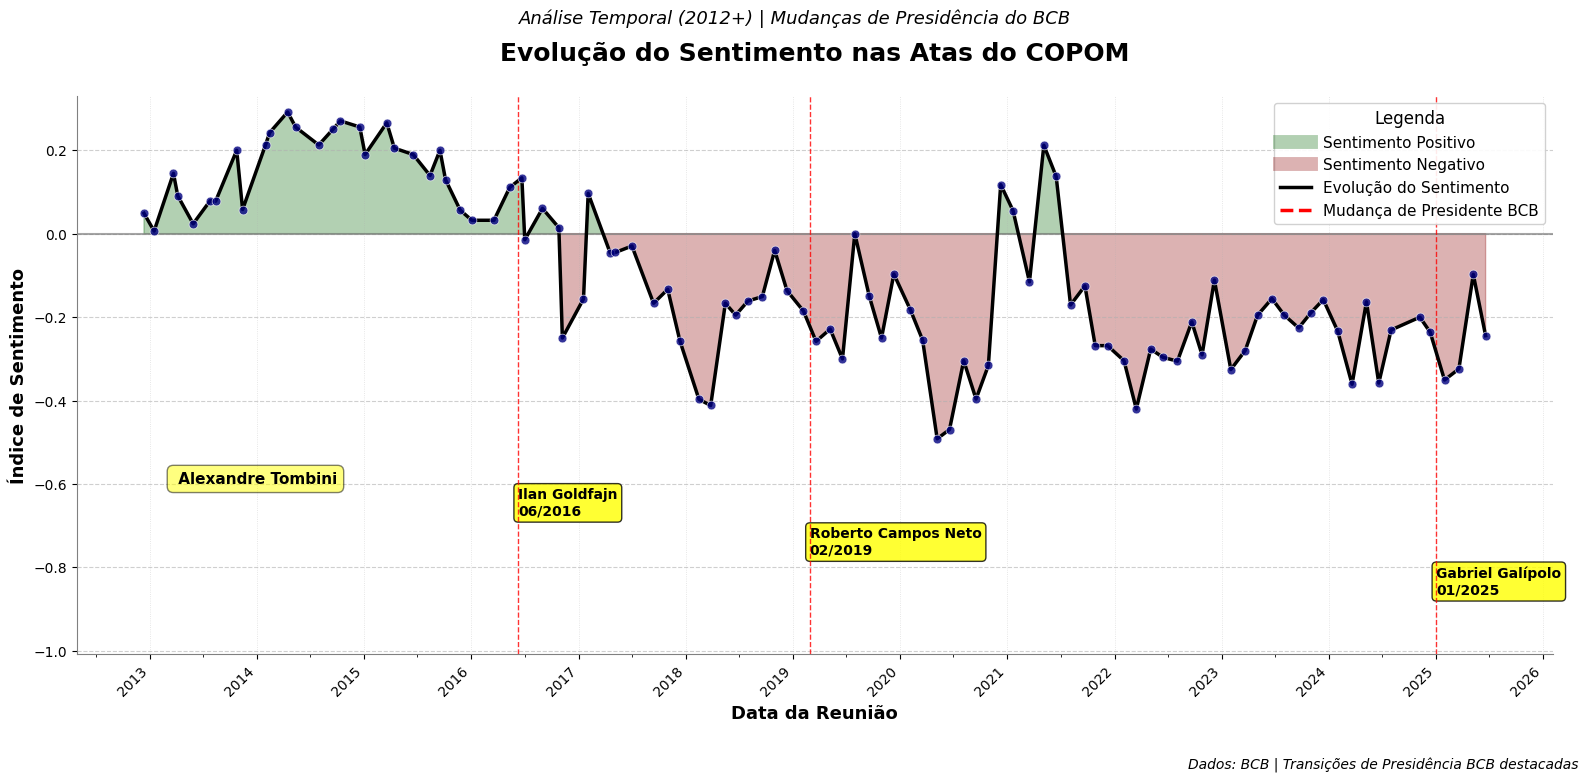

In [30]:
# Exemplo de uso:
fig5 = plotar_sentimento_copom_pres(sentimento)

# salvar o gráfico
fig5.savefig('resultados/plotar_sentimento_copom.png', dpi=300, bbox_inches='tight')


#### **📊 Evolução Temporal do Sentimento por Presidência do BCB**

##### **Análise por Gestões Presidenciais**

##### **Alexandre Tombini (2011-2016): Otimismo Inicial e Deterioração**
- **Contexto**: Alexandre Tombini assumiu em janeiro de 2011, indicado por Dilma Rousseff, permanecendo até junho de 2016 (5 anos, 5 meses) 
- **Sentimento**: **Predominantemente positivo** (2013-2015), com pico máximo em 2014
- **Deterioração**: A partir de 2015, correlacionando com a crise econômica que se agravou especialmente em 2015 e 2016 
- **Política Monetária**: Selic subiu de 7,25% para 14,25% entre 2013-2015, refletindo pressões inflacionárias crescentes


##### **Ilan Goldfajn (2016-2019): Estabilização Gradual**
- **Contexto**: Ilan Goldfajn assumiu em maio de 2016 durante a crise econômica iniciada em 2014, ficando até dezembro de 2018 (2 anos, 9 meses) 
- **Conquistas**: Inflação caiu de 10,67% em 2015 para 2,95% em 2017 
- **Reconhecimento**: Foi eleito "Banqueiro Central do Ano" pela revista The Banker em 2017, também recebendo o prêmio "Melhor Banqueiro Central" da Global Finance em 2018. 


##### **Roberto Campos Neto (2019-2024): Desafios Estruturais**
- **Contexto**: Roberto Campos Neto assumiu em fevereiro de 2019, indicado por Jair Bolsonaro, permaneceu até dezembro de 2024 (5 anos, 10 meses)
- **Sentimento**: **Persistentemente negativo**, agravado pela pandemia (2020-2021)
- **Pressões Políticas**: Alvo de ataques sistemáticos de Lula e do PT, pressionando pela redução de juros 
- **Autonomia**: Primeiro presidente sob o regime de autonomia formal (Lei 179/2021) 


##### **Gabriel  Galípolo (2025-): atual presidente do BCB**
- **Contexto**: Gabriel Galípolo assumiu em janeiro de 2025, indicado por Lula 
- **Sentimento**: **Início negativo** (dados limitados)


##### **Correlações Político-Econômicas**

##### **Mudanças de Regime Comunicacional**
- **2016**: **Ponto de inflexão** coincide exatamente com a **troca Tombini → Goldfajn**
- **2019**: **Continuidade negativa** apesar da mudança **Goldfajn → Campos Neto**

##### **Fatores Determinantes do Sentimento**
1. **Crise Política**: Impeachment (2016) marca início do pessimismo estrutural
2. **Pandemia**: Aprofundamento em 2020 durante gestão Campos Neto
3. **Autonomia vs. Pressão**: Tensão entre independência formal e pressões políticas 
4. **Ciclo Eleitoral**: Incertezas político-econômicas persistentes


##### 🔍 **Insights por Presidência**

**Tombini**: O sentimento positivo inicial reflete **expectations de continuidade** da política bem-sucedida de Meirelles, mas deteriora com a crise política de Dilma.

**Goldfajn**: **Credibilidade técnica** permitiu estabilização gradual, mas sem retorno ao otimismo pré-crise.

**Campos Neto**: **Independência testada** sob pressão política extrema, mantendo postura conservadora necessária mas **comunicacionalmente desgastante**.

**Galípolo**: dados limitados para qualquer conclusão.

### **Conclusão**
A evolução do sentimento nas atas do COPOM reflete **mais do que mudanças de liderança** - espelha transformações estruturais na economia brasileira e no **relacionamento entre Executivo e Banco Central**, com a autonomia formal criando nova dinâmica institucional a partir de 2021.


--------------

In [35]:
import pandas as pd
import plotly.graph_objects as go
from datetime import datetime

# --- Função Refeita com Plotly ---

def plotar_sentimento_copom_pres_plotly(sentimento, titulo="Evolução do Sentimento nas Atas do COPOM"):
    """
    Plota a evolução temporal do sentimento nas atas do COPOM de forma interativa com Plotly,
    destacando períodos positivos/negativos e as transições de presidentes do Banco Central.

    Args:
        sentimento (pd.DataFrame): DataFrame com colunas 'DataReferencia' e 'sentimento'.
        titulo (str): Título principal do gráfico.

    Retorna:
        plotly.graph_objects.Figure: Objeto da figura Plotly para exibição ou customização.
    """
    # 1. PREPARAÇÃO E VALIDAÇÃO DOS DADOS (Mantido da sua função original)
    if sentimento is None or sentimento.empty:
        print("Erro: DataFrame de sentimento está vazio ou é None")
        return None

    if 'DataReferencia' not in sentimento.columns or 'sentimento' not in sentimento.columns:
        print(f"Erro: Colunas 'DataReferencia' e/ou 'sentimento' não encontradas. Colunas: {sentimento.columns.tolist()}")
        return None

    try:
        sentimento = sentimento.sort_values("DataReferencia").copy()
        sentimento.dropna(subset=['DataReferencia', 'sentimento'], inplace=True)
        
        # Converte para datetime se for string, para garantir compatibilidade
        sentimento['DataReferencia'] = pd.to_datetime(sentimento['DataReferencia'])
        
        # Filtro de data
        cutoff_date = pd.Timestamp('2012-01-01')
        sentimento = sentimento[sentimento['DataReferencia'] >= cutoff_date].reset_index(drop=True)

        if sentimento.empty:
            print("Erro: Não há dados válidos após filtros.")
            return None

        # Definição dos presidentes e suas transições
        transicoes_presidentes = [
            {'data': pd.Timestamp('2016-06-09'), 'presidente': 'Ilan Goldfajn'},
            {'data': pd.Timestamp('2019-02-28'), 'presidente': 'Roberto Campos Neto'},
            # Adicione futuras transições aqui
        ]
        
        # Adiciona uma coluna com o nome do presidente para cada data (ótimo para o hover)
        def get_presidente(data):
            if data < transicoes_presidentes[0]['data']:
                return 'Alexandre Tombini'
            for i in range(len(transicoes_presidentes) - 1):
                if transicoes_presidentes[i]['data'] <= data < transicoes_presidentes[i+1]['data']:
                    return transicoes_presidentes[i]['presidente']
            return transicoes_presidentes[-1]['presidente'] # Último presidente da lista

        sentimento['Presidente'] = sentimento['DataReferencia'].apply(get_presidente)

        # 2. CRIAÇÃO DO GRÁFICO COM PLOTLY
        fig = go.Figure()

        # Áreas preenchidas para sentimento positivo e negativo
        fig.add_trace(go.Scatter(
            x=sentimento['DataReferencia'],
            y=sentimento['sentimento'].where(sentimento['sentimento'] >= 0),
            mode='none',
            fill='tozeroy',
            fillcolor='rgba(44, 160, 44, 0.3)', # Verde suave
            name='Sentimento Positivo',
            hoverinfo='none'
        ))
        fig.add_trace(go.Scatter(
            x=sentimento['DataReferencia'],
            y=sentimento['sentimento'].where(sentimento['sentimento'] < 0),
            mode='none',
            fill='tozeroy',
            fillcolor='rgba(214, 39, 40, 0.3)', # Vermelho suave
            name='Sentimento Negativo',
            hoverinfo='none'
        ))

        # Linha principal e marcadores
        fig.add_trace(go.Scatter(
            x=sentimento['DataReferencia'],
            y=sentimento['sentimento'],
            mode='lines+markers',
            name='Índice de Sentimento',
            line=dict(color='black', width=2.5),
            marker=dict(color='#003366', size=7, line=dict(width=1, color='white')), # Azul marinho
            customdata=sentimento[['Presidente', 'sentimento']],
            hovertemplate=(
                "<b>Data:</b> %{x|%d/%m/%Y}<br>"
                "<b>Sentimento:</b> %{y:.3f}<br>"
                "<b>Presidente BCB:</b> %{customdata[0]}"
                "<extra></extra>" # Remove o nome do trace do hover
            )
        ))

        # Adicionar linhas verticais para as transições
        for transicao in transicoes_presidentes:
            if sentimento['DataReferencia'].min() <= transicao['data'] <= sentimento['DataReferencia'].max():
                fig.add_vline(
                    x=transicao['data'], 
                    line_width=1.5, 
                    line_dash="dash", 
                    line_color="red",
                    annotation_text=f"Posse: {transicao['presidente']}",
                    annotation_position="bottom right",
                    annotation_font=dict(size=11, color="red"),
                    annotation_bgcolor="rgba(255,255,255,0.8)"
                )

        # 3. LAYOUT E CUSTOMIZAÇÃO DA APARÊNCIA
        fig.update_layout(
            title=dict(
                text=f"<b>{titulo}</b><br><sup>Análise Temporal (2012+) com Transições de Presidência do BCB</sup>",
                x=0.5,
                font=dict(size=20)
            ),
            xaxis_title="<b>Data da Reunião do COPOM</b>",
            yaxis_title="<b>Índice de Sentimento</b>",
            xaxis=dict(
                showgrid=True, 
                gridcolor='rgba(0,0,0,0.1)',
                zeroline=False
            ),
            yaxis=dict(
                showgrid=True, 
                gridcolor='rgba(0,0,0,0.1)',
                zeroline=True, # Linha no eixo zero
                zerolinewidth=2, 
                zerolinecolor='rgba(0,0,0,0.4)'
            ),
            legend=dict(
                orientation="h",
                yanchor="bottom",
                y=1.02,
                xanchor="right",
                x=1
            ),
            hovermode='x unified', # Melhora a experiência do hover
            template='plotly_white', # Tema limpo e profissional
            margin=dict(l=60, r=40, t=100, b=80),
            autosize=True,
            height=600 # Altura do gráfico em pixels
        )
        
        # Adicionar anotação de fonte de dados
        fig.add_annotation(
            text="Fonte: Dados do Banco Central do Brasil | Elaboração: Seu Nome/Empresa",
            align='right',
            showarrow=False,
            xref='paper',
            yref='paper',
            x=1.0,
            y=-0.15 # Ajuste a posição vertical conforme necessário
        )

        return fig

    except Exception as e:
        print(f"Erro ao criar o gráfico com Plotly: {str(e)}")
        import traceback
        traceback.print_exc()
        return None

# --- Exemplo de Uso com Dados Fictícios ---
if __name__ == '__main__':
    # Criando um DataFrame de sentimento de exemplo
    datas = pd.to_datetime(pd.date_range(start='2012-01-01', end='2024-12-31', freq='45D'))
    # Gerando um sentimento que oscila ao longo do tempo
    sentimento_vals = [0.2 * (i % 10) - 1 + (-1)**i * 0.5 + (i/50) for i in range(len(datas))]
    
    df_sentimento_exemplo = pd.DataFrame({
        'DataReferencia': datas,
        'sentimento': sentimento_vals
    })
    
    # Gerando o gráfico
    figura_plotly = plotar_sentimento_copom_pres_plotly(df_sentimento_exemplo)
    
    # Exibindo o gráfico
    if figura_plotly:
        figura_plotly.show()

        
# Exemplo de uso:
fig5 = plotar_sentimento_copom_pres_plotly(sentimento)
fig5


Erro ao criar o gráfico com Plotly: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`
Erro ao criar o gráfico com Plotly: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`


Traceback (most recent call last):
  File "C:\Users\ecosi\AppData\Local\Temp\ipykernel_26244\4216815138.py", line 104, in plotar_sentimento_copom_pres_plotly
    fig.add_vline(
  File "C:\Users\ecosi\AppData\Roaming\Python\Python312\site-packages\plotly\graph_objs\_figure.py", line 1049, in add_vline
    return super(Figure, self).add_vline(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ecosi\AppData\Roaming\Python\Python312\site-packages\plotly\basedatatypes.py", line 4095, in add_vline
    self._process_multiple_axis_spanning_shapes(
  File "C:\Users\ecosi\AppData\Roaming\Python\Python312\site-packages\plotly\basedatatypes.py", line 4036, in _process_multiple_axis_spanning_shapes
    augmented_annotation = shapeannotation.axis_spanning_shape_annotation(
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ecosi\AppData\Roaming\Python\Python312\site-packages\plotly\shapeannotation.py", line 216, in axis_spanning_shape_annotation
    

##### **Conclusão**

A análise de sentimento das atas do COPOM ao longo do tempo, em conjunto com a trajetória da taxa Selic, permitiu identificar possíveis relações entre o tom das comunicações do Comitê e as decisões de política monetária. Observou-se que períodos de maior otimismo ou pessimismo nas atas frequentemente antecedem ou acompanham movimentos relevantes na taxa básica de juros, sugerindo que o sentimento expresso pode servir como um indicador complementar para a compreensão da estratégia do Banco Central.

###### **Pontos de Melhorias**

Para aprimorar a análise, recomenda-se:
* Utilizar outros léxicos (dicionários) de sentimento, inclusive adaptados ao contexto brasileiro.                                             
* Aplicar técnicas de NLP mais avançadas, como análise de tópicos ou modelos de linguagem pré-treinados.                                          
* Refinar o pré-processamento dos textos para capturar nuances específicas do vocabulário econômico-financeiro.

###### **Sugestões de análises a serem incluídas**

* Relacionar o sentimento das atas com indicadores macroeconômicos, como PIB, inflação, desemprego e cenário externo.                                          
* Avaliar a influência de eventos internacionais relevantes sobre o tom das comunicações do COPOM.                                                                                   
                                        